# Load and Clean


In [41]:
import pandas as pd
df = pd.read_csv("Admission_Predict.csv", index_col = 0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
#clean null data
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [43]:
#categorical to numerical, not a perfect example though
#df = pd.get_dummies(df,columns=['Research'])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# create test and train set

In [44]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.iloc[:,0:7].values
y_train = train.iloc[:,-1].values

x_test = test.iloc[:,0:7].values
y_test = test.iloc[:,-1].values

 

# Preprocessing – Scaling the features


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
x_train.head()

,0,1,2,3,4,5,6
0,0.54,0.535714,0.50,0.625,0.50,0.535581,1.0
1,0.70,0.785714,0.75,0.500,0.25,0.430712,0.0
2,0.66,0.642857,1.00,0.750,1.00,0.647940,1.0
3,0.82,0.857143,1.00,1.000,1.00,0.797753,1.0
4,1.00,0.750000,0.75,1.000,1.00,0.932584,1.0


# Let us have a look at the error rate for different k values

In [47]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.07408328646417714
RMSE value for k=  2 is: 0.06269968101992225
RMSE value for k=  3 is: 0.06449088365090118
RMSE value for k=  4 is: 0.06479092979216561
RMSE value for k=  5 is: 0.06493971563432246
RMSE value for k=  6 is: 0.06372285188103127
RMSE value for k=  7 is: 0.06384864649985891
RMSE value for k=  8 is: 0.06369656665917454
RMSE value for k=  9 is: 0.06276073187129494
RMSE value for k=  10 is: 0.061877836635314466
RMSE value for k=  11 is: 0.06256060422583791
RMSE value for k=  12 is: 0.06369669158220478
RMSE value for k=  13 is: 0.06365382678750964
RMSE value for k=  14 is: 0.06440956984078398
RMSE value for k=  15 is: 0.06482460666775873
RMSE value for k=  16 is: 0.06510083324799563
RMSE value for k=  17 is: 0.0655427609876006
RMSE value for k=  18 is: 0.0659100584316926
RMSE value for k=  19 is: 0.06629251540906644
RMSE value for k=  20 is: 0.06619721167340309


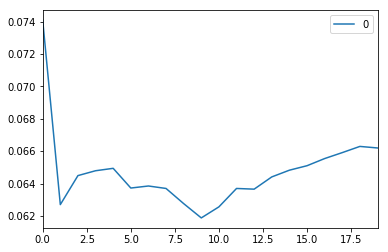

In [49]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


```K=10 gives best result```

In [51]:
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8203393486677059

# Implementing GridsearchCV  

In [ ]:
# this is used to find optimal value of K
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_